<a href="https://colab.research.google.com/github/aneelabashir786/AI-ML-Tasks/blob/main/linear_regression_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import Libraries

In [1]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For  visualizations
from sklearn.linear_model import LinearRegression  # Linear Regression model from scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Common regression evaluation metrics
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling


Load Data

In [2]:
df = pd.read_csv("LR_dataset.csv")  # Load the dataset from the CSV file into a pandas DataFrame


Assign separate input and target features

In [3]:
y = df['price']             # Extract the target variable 'price'
X = df.drop('price', axis=1)  # Drop the target column to get the feature set


Log Transform Target Feature

In [4]:
y_log = np.log(y)  # Apply natural log transformation to reduce skewness in the target variable
y = y_log          # Replace the original target with the log-transformed version for training


Splitting of data

In [5]:
# Split the dataset into 80% training and 20% testing sets with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standarization of input Features

In [6]:
scaler = StandardScaler()  # Initialize the StandardScaler to standardize features
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform it (mean=0, std=1)
X_test_scaled = scaler.transform(X_test)  # Transform test data using the same parameters (no data leakage)

create and train object

In [7]:
model = LinearRegression()  # Initialize the Linear Regression model from scikit-learn
model.fit(X_train_scaled, y_train)  # Train the model on the scaled training data


LinearRegression()

In [8]:
y_train_pred = model.predict(X_train_scaled)  # Predict on training set
y_test_pred = model.predict(X_test_scaled)    # Predict on testing set

Performance Matrics

In [9]:
print("--- Performance Metrics ---")  # Header for clarity
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.4f}")  # Mean Squared Error on training set
print(f"Test MSE:  {mean_squared_error(y_test, y_test_pred):.4f}")   # Mean Squared Error on test set
print(f"Test MAE:  {mean_absolute_error(y_test, y_test_pred):.4f}")  # Mean Absolute Error on test set
print(f"Test R²:   {r2_score(y_test, y_test_pred):.4f}")             # R² score (coefficient of determination) on test set


--- Performance Metrics ---
Train MSE: 0.2781
Test MSE:  0.2395
Test MAE:  0.3888
Test R²:   0.6863


Ploting

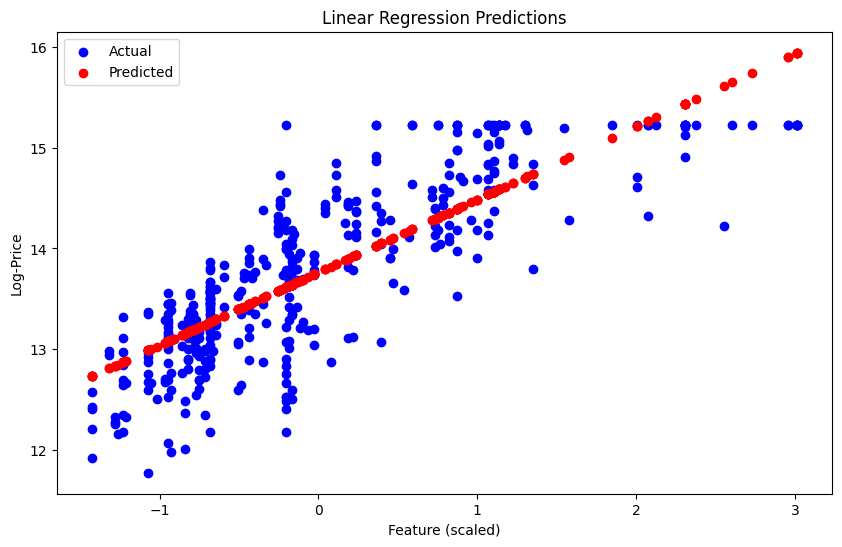

In [10]:
plt.figure(figsize=(10,6))  # Create a figure with specified size
plt.scatter(X_test_scaled[:, 0], y_test, color='blue', label='Actual')  # Plot actual values against the first feature
plt.scatter(X_test_scaled[:, 0], y_test_pred, color='red', label='Predicted')  # Plot predicted values against the same feature
plt.title("Linear Regression Predictions")  # Set the title of the plot
plt.xlabel("Feature (scaled)")  # Label the x-axis
plt.ylabel("Log-Price")  # Label the y-axis (log-transformed target)
plt.legend()  # Display legend to differentiate between actual and predicted
plt.show()  # Show the final plot


Coefficient and Intercept

In [11]:
intercept = model.intercept_  # Get the model's intercept (bias term)
coefficients = model.coef_    # Get the model's coefficients for each feature

print("Intercept:", intercept)  # Print the intercept
print("Coefficients:", coefficients)  # Print the list of coefficients for all features


Intercept: 13.762236826640361
Coefficients: [0.72346957]
